**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
# Import of needed packages 
import math
import time
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize
from scipy.optimize import fsolve
from scipy.optimize import minimize_scalar

# setting a seed
np.random.seed(1986)

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [2]:
# Define the objective function
def objective_function(L, w, tau, alpha, kappa, nu, G):
    C = kappa + (1 - tau) * w * L
    utility = np.log(C**alpha * G**(1 - alpha)) - nu * L**2 / 2
    return -utility  # Minimize the negative of the utility function because we want to maximize

# Define the bounds for L
L_bounds = (0, 24)

# Define the other parameters
w = 1.0
tau = 0.3
alpha = 0.5
kappa = 1.0
nu = 1/(2*16**2)
G_values = [1.0, 2.0]

# Create lists to sstore the results of the analytical solution
optimal_L_values = []
analytical_optimal_L_values = [] 

# Solve the optimization problem and compare to the anylytical expression
for G in G_values:
    result = minimize_scalar(objective_function, bounds=L_bounds, args=(w, tau, alpha, kappa, nu, G), method='bounded')
    optimal_L = result.x
    optimal_L_values.append(optimal_L)

    # Calculate the optimal labor supply choice using the analytical expression
    tilde_w = (1 - tau) * w
    analytical_optimal_L = (-kappa + np.sqrt(kappa**2 + 4 * alpha / nu * tilde_w**2)) / (2 * tilde_w)
    analytical_optimal_L_values.append(analytical_optimal_L)
  
# Print the results
for i, G in enumerate(G_values):
    print(f"Optimal value of L for G = {G} (from optimization): {optimal_L_values[i]}")
    print(f"Optimal value of L for G = {G} (analytical): {analytical_optimal_L_values[i]}")
    print(f"Are the results equal? {np.isclose(optimal_L_values[i], analytical_optimal_L_values[i])}")
    print()






# Calculate the optimal labor supply for different values of G
#G_values = [1.0, 2.0]
#for G in G_values:
    #w_tilde = (1 - tau) * w
    #L_star = optimal_labor_supply(w_tilde)
    #print(f"For G = {G}, the optimal labor supply is L* = {L_star}")

# Verify the optimal labor supply function
#L = sp.symbols('L')
#w_tilde = (1 - tau) * w
#C = kappa + (1 - tau) * w * L
#utility = sp.log(C*alpha*G*(1 - alpha)) - nu * L**2 / 2
#optimal_L = sp.solve(sp.diff(utility, L), L)
#print(f"The derivative of the utility function is zero for L* = {optimal_L}")

Optimal value of L for G = 1.0 (from optimization): 15.301650159969068
Optimal value of L for G = 1.0 (analytical): 15.30165022719559
Are the results equal? True

Optimal value of L for G = 2.0 (from optimization): 15.301650159969068
Optimal value of L for G = 2.0 (analytical): 15.30165022719559
Are the results equal? True



**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

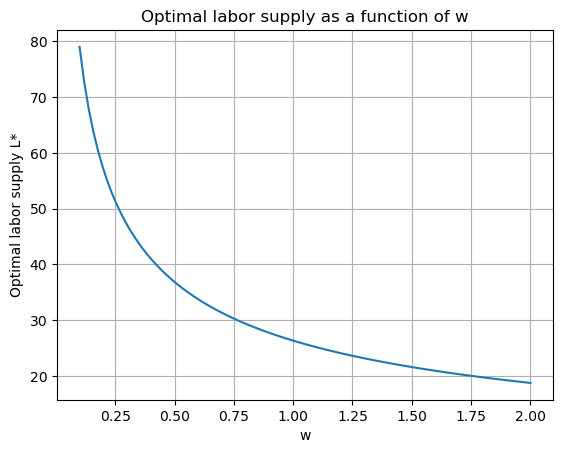

In [3]:
# Creating a plot to show how the optimum labor supply L* is contingent on w:

# Define the optimal labor supply function
def optimal_labor_supply(w_tilde):
    return (-kappa + sp.sqrt(kappa*2 + 4 * alpha / nu * w_tilde*2)) / (2 * w_tilde)

# Generate a range of w values to run through
w_values = np.linspace(0.1, 2, 100)

# Calculate the optimal labor supply for each w
L_star_values = [optimal_labor_supply((1 - tau) * w) for w in w_values]

# Plot L_star as a function of w
plt.plot(w_values, L_star_values)
plt.xlabel('w')
plt.ylabel('Optimal labor supply L*')
plt.title('Optimal labor supply as a function of w')
plt.grid(True)
plt.show()

The optimal labor supply $L^{\star}(\tilde{w})$ is given by the equation:

$L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$

where $\tilde{w} = (1-\tau)w$.

From this equation, we can see that the optimal labor supply is a function of the wage $w$ through $\tilde{w}$. As $w$ increases, $\tilde{w}$ also increases, assuming the tax rate $\tau$ is constant. 

The dependence of $L^{\star}(\tilde{w})$ on $w$ is non-linear due to the square root term in the numerator and the $\tilde{w}$ term in the denominator. 

Specifically, the term $\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}$ increases with $w$, which would lead to an increase in $L^{\star}(\tilde{w})$. However, the increase is moderated by the $\tilde{w}$ in the denominator. 

Therefore, as $w$ increases, we would expect $L^{\star}(\tilde{w})$ to increase, but at a decreasing rate due to the square root term and the $\tilde{w}$ in the denominator. 

This is the theoretical explanation. For a more concrete understanding, it would be helpful to plot $L^{\star}(\tilde{w})$ as a function of $w$ as shown in the previous response.


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


In [ ]:
# Define the optimal labor supply function
def optimal_labor_supply(tau):
    w_tilde = (1 - tau) * w
    return (-kappa + np.sqrt(kappa*2 + 4 * alpha / nu * w_tilde*2)) / (2 * w_tilde)

# Define the government consumption function
def government_consumption(tau):
    return tau * w * optimal_labor_supply(tau)

# Define the worker utility function
def worker_utility(tau):
    C = kappa + (1 - tau) * w * optimal_labor_supply(tau)
    G = government_consumption(tau)
    return np.log(C*alpha*G*(1 - alpha)) - nu * optimal_labor_supply(tau)**2 / 2

# Generate a grid of tau values
tau_values = np.linspace(0, 1, 100)

# Calculate L, G, and utility for each tau
L_values = [optimal_labor_supply(tau) for tau in tau_values]
G_values = [government_consumption(tau) for tau in tau_values]
utility_values = [worker_utility(tau) for tau in tau_values]

# Plot L, G, and utility as functions of tau
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(tau_values, L_values)
plt.ylabel('Optimal labor supply L*')

plt.subplot(3, 1, 2)
plt.plot(tau_values, G_values)
plt.ylabel('Government consumption G')

plt.subplot(3, 1, 3)
plt.plot(tau_values, utility_values)
plt.xlabel('tau')
plt.ylabel('Worker utility')

plt.tight_layout()
plt.show()

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

In [ ]:
# Define the objective function to be minimized
def objective(tau):
    w_tilde = (1 - tau) * w
    L_star = optimal_labor_supply(tau)
    G = tau * w * L_star
    utility = np.log((kappa + (1 - tau) * w * L_star) * alpha * G * (1 - alpha)) - nu * L_star**2 / 2
    return -utility

# Run the optimizer
result = minimize(objective, 0.5, bounds=[(0, 1)], method='L-BFGS-B')

# Print the optimal tau
print(f"The optimal tau is {result.x}")

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [ ]:
# Define the function to be solved
def equation(G):
    tau_star = result.x
    w_tilde = (1 - tau_star) * w
    L_star = optimal_labor_supply(tau_star)
    return G - tau_star * w * L_star

# Solve the equation for G
G_star = fsolve(equation, 1)

# Print the solution
print(f"The G that solves the equation is {G_star}")

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [ ]:
# Define the objective function to be minimized
def objective(tau):
    w_tilde = (1 - tau) * w
    L_star = optimal_labor_supply(w_tilde)
    G = tau * w * L_star
    C = w * L_star - G
    utility = np.log(C * alpha * G_star[0]**(1 - alpha)) - nu
    return -utility

# Run the optimizer
result = minimize(objective, tau, method='Nelder-Mead')

# Print the optimal tau
print(f"The optimal tau while keeping G is {result.x}")

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [ ]:
#Set Parameters

eta = 0.5
w = 1.0

def calculate_profits(kappa, l):
    return kappa * l ** (1 - eta) - w * l

def find_optimal_l(kappa):
    optimal_l = ((1 - eta) * kappa / w) ** (1 / eta)
    max_profit = calculate_profits(kappa, optimal_l)
    return optimal_l, max_profit

kappas = [1.0, 2.0]
results = {}

for kappa in kappas:
    optimal_l, max_profit = find_optimal_l(kappa)
    results[kappa] = (optimal_l, max_profit)

for kappa, (optimal_l, max_profit) in results.items():
    print(f"For kappa = {kappa}:")
    print(f"Optimal l: {optimal_l}")
    print(f"Max profit: {max_profit}")
    print()

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [ ]:
#Set baseline parameters (Note: eta and w are set in Q1)
rho = 0.9
iota = 0.01
sigma_epsilon = 0.1
R = (1 + 0.01)**(1 / 12)

# Simulation parameters
K = 10000  # Number of shock series to simulate

# Generate shock series using the normal distribution as provided
epsilon_series = np.random.normal(-0.5 * sigma_epsilon**2, sigma_epsilon, (K, 120))

# Initialize variables
l = np.zeros((K, 120))
kappa = np.zeros((K, 120))
kappa[:, 0] = 1.0

# Calculate l_t and kappa_t for each time period and shock series
for t in range(1, 120):
    log_kappa = np.log(kappa[:, t - 1])
    log_kappa_next = rho * log_kappa + epsilon_series[:, t - 1]
    kappa[:, t] = np.exp(log_kappa_next)
    l[:, t] = ((1 - eta) * kappa[:, t] / w)**(1 / eta)

# Calculate h(epsilon_0^k, epsilon_1^k, ..., epsilon_119^k) for each shock series
discount_factors = R**(-np.arange(120))
h_values = np.sum(discount_factors * (kappa * l**(1 - eta) - w * l - (l != np.roll(l, 1, axis=1))* iota), axis=1)
                                                              # the np.roll line represents a comparison between current employment l 
                                                              # and lagged employment shifted by one time period
                                                              # used as an indicator function to determine whether there is a change in employment level,
                                                              # from previous period to current period
                                                              # helps identify periods where firing or hiring occurs; incorporates fixed adjustment cost into ex post value


# Calculate the approximate expected value H
H = np.mean(h_values)

print(f"Approximated ex ante expected value H: {H}")

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [ ]:
# Holding baseline parameters constant from previous question and adding delta
delta = 0.05  # Policy change parameter

# Simulation parameters
K = 10000  # Number of shock series to simulate

# Generate shock series using the normal distribution as provided
epsilon_series = np.random.normal(-0.5 * sigma_epsilon**2, sigma_epsilon, (K, 120))

# Initialize variables
l = np.zeros((K, 120))
kappa = np.zeros((K, 120))
kappa[:, 0] = 1.0

# Calculate l_t and kappa_t for each time period and shock series
for t in range(1, 120):
    log_kappa = np.log(kappa[:, t - 1])
    log_kappa_next = rho * log_kappa + epsilon_series[:, t - 1]
    kappa[:, t] = np.exp(log_kappa_next)
    

    # Calculate l_t based on the new policy
    l_star = ((1 - eta) * kappa [:, t] / w)**(1 / eta)
    l_change = np.abs(l[:, t - 1] - l_star)
    l[:, t] = np.where(l_change > delta, l_star, l[:, t - 1]) # using the np.where conditional function, 
                                                              # check whether condition (1) is true, 
                                                              # value to then be assigned (2) if true  
                                                              # and value to be assigned if false (3)                                                          

# Calculate h(epsilon_0^k, epsilon_1^k, ..., epsilon_119^k) for each shock series
discount_factors = R**(-np.arange(120))
h_values = np.sum(discount_factors * (kappa * l**(1 - eta) - w * l - (l != np.roll(l, 1, axis=1)) * iota), axis=1) 

# Calculate the approximate expected value H
H = np.mean(h_values)

print(f"Approximated ex ante expected value H: {H}")

The policy check $l_{change}$ > $\Delta$ compares the absolute difference between $l_{t-1}$ and $l^{star}$ with the threshold $\Delta$. If the difference is greater than $\Delta$, $l_{t}$ is set to $l_{star}$, otherwise, it retains the previous value $l_{t-1}$.

As you can see from running the code, by adding the $\Delta$ parameter and incorporating this policy, we are able to achieve a higher profit than previously when $\Delta$ = 0

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [ ]:
#Baseline parameters are constant from previous question(s)

# Simulation parameters
K = 10000  # Number of shock series to simulate
delta_values = np.linspace(0, 0.25, 100)  # Range of delta values to test

# Generate shock series using the normal distribution as provided
epsilon_series = np.random.normal(-0.5 * sigma_epsilon**2, sigma_epsilon, (K, 120))

# Initialize variables
kappa = np.zeros((K, 120))
kappa[:, 0] = 1.0

# Calculate labr_t and kappa_t for each time period and shock series
for t in range(1, 120):
    log_kappa = np.log(kappa[:, t - 1])
    log_kappa_next = rho * log_kappa + epsilon_series[:, t - 1]
    kappa[:, t] = np.exp(log_kappa_next)

# Calculate h(epsilon_0^k, epsilon_1^k, ..., epsilon_119^k) for each shock series
discount_factors = R**(-np.arange(120))
h_values = np.zeros(len(delta_values), dtype=float)                         #initialize array of zeros for h_values whose length is determined by # of delta values analayzed

for i, delta in enumerate(delta_values):
    l = np.zeros((K, 120))                                                  # store the values of l_t for each shock series and time period
    l_star = ((1 - eta) * kappa / w)**(1 / eta)                             # from q3
    l[:, 0] = l_star[:, 0]                                                  # initialize employment level in 1st time period = desired level based on initial kappa

    for t in range(1, 120):                                                 # begin nested loop for each time period
        l_change = np.abs(l[:, t - 1] - l_star[:, t])                       # as before, calculate the absolute difference and store in l_change
        l[:, t] = np.where(l_change > delta, l_star[:, t], l[:, t - 1])     # updating l_t values given the policy defined by condition statement

    h_values[i] = np.mean(
        np.sum(discount_factors * (kappa * l**(1 - eta) - w * l - (l != np.roll(l, 1, axis=1)) * iota), axis=1)
    )

                                                                            # calculating H and h_values simultaneously by taking the mean of the sum of the expression defined in previous questions(s)


window_size = 5
moving_average = np.convolve(h_values, np.ones(window_size) / window_size, mode='valid')        # applying a moving average to our h_values by the convolution approach between... 
                                                                                                # the h_values array and the weight array 


# Find the optimal delta maximizing H
optimal_delta = delta_values[np.argmax(h_values)]                           # stores the optimal delta that maximizes H
max_h = np.max(h_values)                                                    # returns the max value in the h_values array; highest value of H among the delta's


print(f"Optimal Delta: {optimal_delta}")
print(f"Maximum H: {max_h}")

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(delta_values, h_values, label='Original')
plt.plot(delta_values[window_size - 1:], moving_average, label='Moving Average')
plt.xlabel("Delta")
plt.ylabel("H")
plt.title("Effect of Delta on H")
plt.legend()
plt.show()


You can see from the graph displayed above that the adjustment of the policy or thereby the $\Delta$ values has an initial increasing effect up to a global maximum after which increasing $\Delta$ any further has negative effects on $H$; there exists an inverse-U relationship between $\Delta$ and $H$ with a long-tail on the right side approaching an 'asymptote' which we can visualize by simply adjusting the upper-bound of $\Delta$ from 0.25 to whatever value we see fit.

By applying a moving average, we are able to create a smoothed curve that gives a better representation of the overall relationship between $\Delta$ and $H$. It can provide a clearer understanding of how $H$ varies with different $\Delta$ values by removing short-term fluctuations and emphasizing the long-term trends.

This optimal $\Delta$ is approximately 0.075 at a maximum $H$ value of ~ 28.35.


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



 An alternative policy:
 
 Introduce a dynamic adjustment to the wage rate w based on the previous period's employment level. The idea behind this policy is to adjust the wage rate in response to changes in employment, aiming to optimize labor allocation and enhance profitability.

In [ ]:
#Baseline parameters are constant from previous question(s)

# Simulation parameters
K = 10000  # Number of shock series to simulate
delta_values = np.linspace(0, 0.25, 100)  # Range of delta values to test

# Generate shock series using the normal distribution as provided
epsilon_series = np.random.normal(-0.5 * sigma_epsilon**2, sigma_epsilon, (K, 120))

# Initialize variables
kappa = np.zeros((K, 120))
kappa[:, 0] = 1.0

# Calculate labr_t and kappa_t for each time period and shock series
for t in range(1, 120):
    log_kappa = np.log(kappa[:, t - 1])
    log_kappa_next = rho * log_kappa + epsilon_series[:, t - 1]
    kappa[:, t] = np.exp(log_kappa_next)

# Calculate h(epsilon_0^k, epsilon_1^k, ..., epsilon_119^k) for each shock series
discount_factors = R**(-np.arange(120))
h_values = np.zeros(len(delta_values), dtype=float)

optimal_wage_adjustments = np.zeros(len(delta_values), dtype=float)  # Initialize array to store optimal wage adjustments

for i, delta in enumerate(delta_values):
    l = np.zeros((K, 120))  # store the values of l_t for each shock series and time period
    l_star = ((1 - eta) * kappa / w)**(1 / eta)  # from q3
    l[:, 0] = l_star[:, 0]  # initialize employment level in 1st time period = desired level based on initial kappa

    for t in range(1, 120):  # begin nested loop for each time period
        l_change = np.abs(l[:, t - 1] - l_star[:, t])  # as before, calculate the absolute difference and store in l_change
        l[:, t] = np.where(l_change > delta, l_star[:, t], l[:, t - 1])  # updating l_t values given the policy defined by condition statement

    # Calculate wage adjustment
    wage_adjustment = w * l - kappa * l**(1 - eta)

    h_values[i] = np.mean(
        np.sum(discount_factors * (kappa * l**(1 - eta) - w * l - (l != np.roll(l, 1, axis=1)) * iota), axis=1)
    )

    # Calculate optimal wage adjustment that maximizes H
    optimal_wage_adjustments[i] = np.mean(wage_adjustment)

# Find the optimal delta maximizing H
optimal_delta = delta_values[np.argmax(h_values)]  # stores the optimal delta that maximizes H
max_h = np.max(h_values)  # returns the max value in the h_values array; highest value of H among the delta's
optimal_wage_adjustment = optimal_wage_adjustments[np.argmax(h_values)]  # optimal wage adjustment maximizing H

print(f"Optimal Delta: {optimal_delta}")
print(f"Maximum H: {max_h}")
print(f"Optimal Wage Adjustment: {optimal_wage_adjustment}")

# Plot the results

# Create a 3D figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of delta, wage_adjustment, and h_values
ax.scatter(delta_values, optimal_wage_adjustments, h_values, c=h_values, cmap='viridis')

# Set labels and title
ax.set_xlabel('Delta')
ax.set_ylabel('Wage Adjustment')
ax.set_zlabel('H')
ax.set_title('Effect of Delta and Wage Adjustment on H')

# Show the plot
plt.show()

The policy choice of wage adjustment in our model aims to maximize the value of the objective function `H`. By optimizing the wage adjustment, we seek to find the point where `H` is maximized, indicating its highest level of profitability.

The optimal wage adjustment obtained through our analysis provides several benefits. Firstly, it allows the firm to align labor costs more closely with the desired employment level ($\ell^{star}$) based on the demand-shock variable ($\kappa$). This alignment helps to achieve greater efficiency in resource allocation, as the wage adjustment incentivizes the desired employment level, reducing the gap between actual and desired employment.

The optimal wage adjustment positively impacts profitability, with a larger max $H$ in this question. By adjusting wages in response to deviations from the desired employment level, the firm can enhance labor utilization and productivity, leading to improved overall profitability.

Furthermore, the policy choice of wage adjustment reflects a dynamic approach to managing labor costs over time. As economic conditions change and the firm's desired employment level evolves, the wage adjustment allows for flexibility in adapting to these changes. This adaptability contributes to maintaining a competitive advantage by optimizing labor resource allocation in a dynamic business environment as we had noted earlier.

*Note: You can see from our code that the optimal delta and the optimal wage adjustment represent different parameters in the model, and they are optimized independently to maximize different objectives, but our shown in the 3D scatter plot to assess their behaviour*

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [ ]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

In [ ]:
#Implementing the refined global optimizer with multi-start:


# step 1: Set bounds and tolerances 
bounds_given = (-600,600)
tolerance_given = 0.00000001

# step 2: Set warm-up iterations and maximum number of iterations 
num_warmup_iters_given = 10
num_max_iters_given = 1000

# step 3: Defining the refined_global_opimizer according to the algorithm 
def refined_global_optimizer_griewank(bounds = bounds_given,
                                      tolerance = tolerance_given,
                                      num_warmup_iters = num_warmup_iters_given,
                                      num_max_iters = num_max_iters_given):
    number_of_iterations = 0                                                    #setting up counter for iterations
    eff_initial_guesses_list = []                                               #setting up empty list to store values
    current_best = None

    for k in range(num_max_iters):
        x_k = np.random.uniform(bounds[0], bounds[1], size=len(bounds))         #step 3A

        if k >= num_warmup_iters:
            chi_k = 0.5 * (2/(1 + np.exp((k - num_warmup_iters) / 100)))        #step 3C
            x_k0 = chi_k * x_k + (1-chi_k) * current_best                       #step 3D
        else:                                                                   
            x_k0 = x_k                                                          #step 3B
        eff_initial_guesses_list.append(x_k0)                                   #appending effective initial guesses to the list
        number_of_iterations += 1                                               #adding to counter of iterations

        result = minimize(griewank, x_k0, method='BFGS', tol=tolerance)         #step 3E
        x_kstar = result.x

        if k == 0 or griewank(x_kstar) < griewank(current_best):                #step 3F
            current_best = x_kstar

        if griewank(current_best) < tolerance:                                  #step 3G
            break

    # step 4: Returning the result 
    return current_best, eff_initial_guesses_list, number_of_iterations


# Call the refined_global_optimizer_griewank function and print the solution it found
Best_result, eff_initial_guesses_global_list, number_of_iterations = refined_global_optimizer_griewank()
print("The global minimum found by the algorithm is:", Best_result)
print("The number of iterations it took the code to find a minimum was:", number_of_iterations)

In [ ]:
# Setting up a plot to show how the initial guesses x_k0 vary with the progress of the iteration counter k:


# turning the list of effective initial guesses into a numpy-array
eff_initial_guesses_global_list = np.array(eff_initial_guesses_global_list)

# extracting the x1 and x2 values 
x1 = eff_initial_guesses_global_list[:, 0]
x2 = eff_initial_guesses_global_list[:, 1]

# plotting x1 and x2 values against each other and connecting the dots with a line from start to finish
plt.figure                                                                                              # setting figure
plt.scatter(x1, x2)                                                                                     # creating scatterplot
plt.plot(x1[10:], x2[10:], '-o', linewidth=0.5)                                                         # creating a line plot over the top to connect the dots for the ones after multistart
plt.plot(x1[0:10], x2[0:10], '-o', linewidth=0, color='red', label='Multi-start points')                # marking starting points red
plt.plot(x1[-1], x2[-1], '-o', linewidth=0, color='yellow', label='End point')                          # marking end point yellow
plt.xlabel('x1')                                                                                        # labeling axis
plt.ylabel('x2')                                                                                        # labeling axis
plt.title('Development of the effective initial guesses with increasing iteration counter')             # title
plt.legend()                                                                                            # show the legend
plt.show()                                                                                              # make plot show up

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

In [ ]:
# Creating a function to evaluate the performance of our refined_global_optimizer_griewank:


def performance_evaluation_griewank(runs=20, warm_up_iterations = 10):

    # Creating lists to store the number of iterations it took to find a sufficient minimum
    time_to_run_list = []
    iterations_to_converge_list = []
    results_list = []

    # Running through the refined_global_optimizer_griewank an collecting data
    for _ in range(runs):
        start_time = time.time()
        rest_result, eff_initial_guesses_global_list, number_of_iterations = refined_global_optimizer_griewank(num_warmup_iters = warm_up_iterations)
        end_time = time.time()
        elapsed_time = end_time - start_time
        time_to_run_list.append(elapsed_time)
        iterations_to_converge_list.append(number_of_iterations)
        results_list.append(rest_result)

    # Calculating the mean of the data generated for time and iterations
    mean_time = sum(time_to_run_list) / len(time_to_run_list)
    mean_iterations = sum(iterations_to_converge_list) / len(iterations_to_converge_list)

    # Calculating the mean euklidian distance from the global minimum (0,0)
    euklidan_distance_to_0 = []
    for result in results_list:
        distance = math.sqrt((0-result[0])**2 + (0-result[1])**2)
        euklidan_distance_to_0.append(distance)
    mean_euklidian_distance = sum(euklidan_distance_to_0) / len(euklidan_distance_to_0)

    # Printing out the results
    print("The average time the function took to find a minimum (and append its results to variables) was:", mean_time, "seconds")
    print("The average number of iterations was:", mean_iterations)
    print("The average euklidian distance to the global minimum at (0,0) is:", mean_euklidian_distance)

In [ ]:
# Evaluating the performance of refined_global_optimizer_griewank with 10 warm-up iterations
performance_evaluation_griewank(warm_up_iterations=10)

In [ ]:
# Evaluating the performance of refined_global_optimizer_griewank with 100 warm-up iterations
performance_evaluation_griewank(warm_up_iterations=100)

*Answer:* 

When we set $\underline{K} = 10$ the code on average took about 1.9 seconds (on my slow PC) to converge after about 309 iterations (10 of those were random multi-start points). The  minimum found had an euklidian distance to the point of (0,0) of about 1.253e-8. 

When we set $\underline{K} = 100$ the code on average took about 2.6 seconds to converge after about 404 iterations (100 of those were random multi-start points). The  minimum found had an euklidian distance to the point of (0,0) of about 1.246e-8. 

Depending on the seed set the above numbers do change a bit but generally tend to stay in the same ballpark. We can infer that when increasing the number of multi-start points the convergence does happen a bit quicker but the number of the multi-start point must obviously also be considered. It was due to this reason that the runs with 100 multi-start points did take longer than with 10. But using more multi-start points can be useful in other instances depending on the grid size to be searched. The accuracy of the final minimum found does not seem to be dependent on the number of multi-start points but rather on the tolerance provided to the optimizer (I guess this only applies though if you got enough random start points to eventually find your way to the global minimum)